In [1]:
import pandas as pd 
df = pd.read_csv('listings_toronto.csv', sep =';')

In [22]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [2]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'description', 'neighborhood_overview', 'picture_url',
       'host_url', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',


In [3]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [4]:
from pycaret.regression import *

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'description', 'neighborhood_overview', 'picture_url',
       'host_url', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',


In [6]:
df_pred = df.copy ()
df_pred_new = df_pred[["neighbourhood","accommodates", "property_type", "room_type", "price", "minimum_nights", "maximum_nights"]]

In [7]:
setup = setup(df_pred_new, target = 'price')

,Description,Value
0,Session id,1681
1,Target,price
2,Target type,Regression
3,Original data shape,"(19275, 7)"
4,Transformed data shape,"(19275, 10)"
5,Transformed train set shape,"(13492, 10)"
6,Transformed test set shape,"(5783, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [14]:
best = compare_models()
print(best)

ElasticNet(random_state=1681)


In [11]:
results = pull()
print(results)

                                    Model       MAE          MSE      RMSE  \
en                            Elastic Net   99.1961  124946.9714  333.1203   
lasso                    Lasso Regression   99.8077  124898.4826  333.1333   
llar         Lasso Least Angle Regression   99.8074  124898.4484  333.1332   
br                         Bayesian Ridge  100.0189  124923.5102  333.1911   
lr                      Linear Regression  100.3334  124968.2167  333.2912   
ridge                    Ridge Regression  100.3313  124967.8924  333.2905   
lar                Least Angle Regression  100.3392  124969.3545  333.2930   
huber                     Huber Regressor   86.8399  127184.6235  336.2940   
lightgbm  Light Gradient Boosting Machine   93.0220  127533.5512  338.7906   
omp           Orthogonal Matching Pursuit  111.1050  130700.9160  342.7269   
gbr           Gradient Boosting Regressor   92.4853  134406.4150  347.9917   
dummy                     Dummy Regressor  128.7941  136372.5436

In [15]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,97.6332,274883.6877,524.2935,0.0208,0.5903,0.4272
1,81.2324,69767.6913,264.1357,0.1390,0.5289,0.4316
2,81.4788,98765.8739,314.2704,0.0637,0.5496,0.4106
3,83.7623,54727.1912,233.9384,0.1640,0.5552,0.4279
4,82.0328,57801.2271,240.4189,0.1143,0.5684,0.4614
5,98.1752,245428.2015,495.4071,0.0448,0.5629,0.4128
6,74.3773,22371.4377,149.5708,0.2824,0.5327,0.4330
7,96.1067,224172.4610,473.4685,0.0449,0.5581,0.4114
8,86.7503,95663.4303,309.2951,0.0898,0.5463,0.4205


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
huber=  tune_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,98.1031,273593.5126,523.0617,0.0254,0.5752,0.4515
1,81.5708,69082.2093,262.8349,0.1475,0.5372,0.4569
2,82.1291,98320.9154,313.5617,0.0679,0.5456,0.4327
3,84.2490,54059.3721,232.5067,0.1742,0.5603,0.4488
4,82.7143,56942.0028,238.6252,0.1275,0.5736,0.4850
5,98.8667,244633.0597,494.6039,0.0479,0.5599,0.4351
6,75.1345,21994.5352,148.3055,0.2945,0.5351,0.4566
7,96.6386,223447.8703,472.7027,0.0480,0.5656,0.4336
8,87.3349,94886.9324,308.0372,0.0972,0.5526,0.4425


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

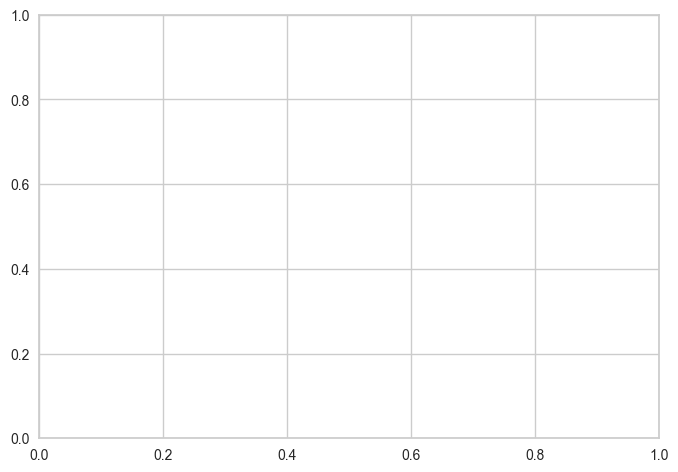

In [17]:
evaluate_model(huber)

In [18]:
final_best = finalize_model(huber)

In [19]:
save_model(huber, 'ml_airbnb') #se guarda un archivo que es el modelo y ese archivo se usa para hacer predicciones 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['accommodates', 'minimum_nights',
                                              'maximum_nights'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['neighbourhood', 'property_type',
                                              'room_type'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  Transfo...include=['room_type'],
                                     transformer=OneHotEncoder(cols=['room_type'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['neig